In [2]:
# Imports
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import pandas as pd
import keras
import tensorflow
import os
import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [1]:
# Dataset conversion imports
import glob
import PIL as pillow
from PIL import Image
import numpy as np
from sklearn import svm

In [4]:
from sklearn.preprocessing import OneHotEncoder
# Loading training dataset/labels
csv = pd.read_csv('/home/ik/Downloads/dataset/train/train.truth.csv')
image = csv['fn']
label = csv['label'].values
onehot_encoded = OneHotEncoder(sparse = False).fit_transform(label.reshape(-1,1))
onehot_encoded[0]

array([1., 0., 0., 0.])

In [ ]:
# Image preprocessing, turning images into grey scale, using just one channel for better usage of processor
# TODO grey scale convert

In [5]:
# Dataset conversion into numpy array
tic = time.time()
dataset_dir = '/home/ik/Downloads/dataset/train.rotfaces'
filelist = glob.glob(os.path.join(dataset_dir,'train/*.jpg'))
dataset_numpy = np.array([np.array(Image.open(fname)) for fname in filelist])
print(round(time.time() - tic,3)) # cpu, ouch

595.257


image shape: (48896, 64, 64, 3)


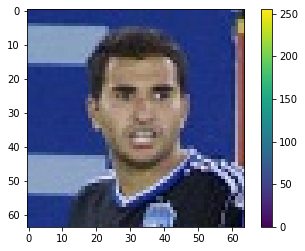

In [24]:
# Visualizing a converted image
# TODO Normalização na imagem
print('image shape:',dataset_numpy.shape)
plt.imshow(dataset_numpy[0])
plt.colorbar()

In [26]:
# Splitting into training and test
image_train, image_test, label_train, label_test = train_test_split(dataset_numpy, onehot_encoded, test_size=0.25)
total_classifiers = 4
classifiers = ['rotated_left', 'rotated_right', 'upside_down', 'upright']
label_train
image_train = image_train/float(255)

In [27]:
# Creating the model using sequential layers
#    using Flatten to be the input
#    using Dense layer with 128 neurons to be the first hidden layer
#    using dropout layer
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4,  activation='softmax')
    ])

In [28]:
# Compiling the model
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
historico = modelo.fit(image_train,
            label_train,
            epochs=15,
            validation_split=0.2)

Train on 29337 samples, validate on 7335 samples
Epoch 1/15
13760/29337 [=============>................] - ETA: 37s - loss: 1.6000 - acc: 0.2483

KeyboardInterrupt: 

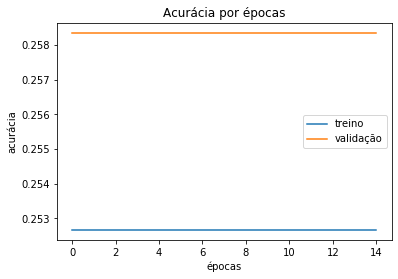

In [16]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

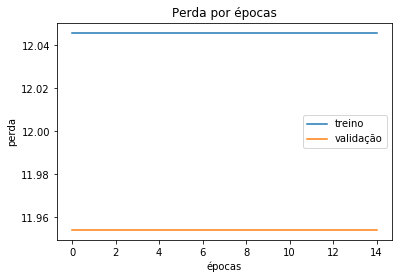

In [17]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])